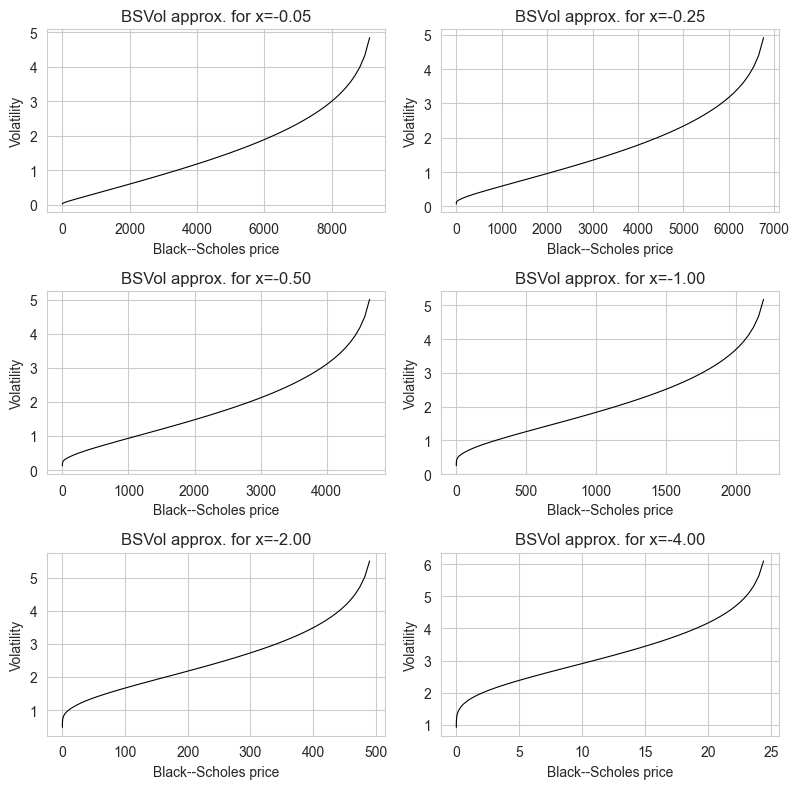

In [11]:
from rational import OptionData
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

sns.set_style("whitegrid")


def rational_quote(x, vol):
    return np.exp(x / 2) * norm.cdf(x / vol + vol / 2) - np.exp(-x / 2) * norm.cdf(
        x / vol - vol / 2
    )


logmons = [-0.05, -0.25, -0.50, -1, -2, -4]
fwd = 100.00


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axs = axs.flatten()

for i, x in enumerate(logmons):
    ax = axs[i]
    od = OptionData(x, True)
    quotes = np.logspace(-6, -2, 16, base=10)
    quotes = np.concatenate([quotes, np.linspace(0.5 * 1e-2, od.bMax, 64)])
    y = [od.iter_zero_approx(b) for b in quotes]

    prices = fwd * np.exp(x) * quotes  # price = sqrt(Fwd * K) * quote where K = F * e^x
    sns.lineplot(x=100 * prices, y=y, linewidth=0.80, color="k", ax=ax)
    ax.set_title(f"BSVol approx. for x={x:.2f}")
    ax.set_xlabel("Black--Scholes price")
    ax.set_ylabel("Volatility")

plt.tight_layout()
plt.show()
plt.close()